# Case Study on Probability for Data Science

PROBLEM STATEMENT:  

    To make a suitable machine learning algorithm to predict if the mushroom is 
edible or poisonous (e or p) using the given dataset.
(Along with other ML algorithms, Naïve Bayes’ Classifier should be applied)
Also, if some data pre-processing is necessary do that as well.


Attribute Information:

• cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s 
• cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s 
• cap-colour: brown=n, buff=b, cinnamon=c, Gray=g, green=r, pink=p, purple=u,
red=e, white=w, yellow=y 
• bruises: bruises=t, no=f 
• odour: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n,
pungent=p, spicy=s 
• gill-attachment: attached=a, descending=d, free=f, notched=n 
• gill-spacing: close=c, crowded=w, distant=d 
• gill-size: broad=b, narrow=n 
• gill-colour: black=k, brown=n, buff=b, chocolate=h, grey=g, green=r, orange=o, 
pink=p, purple=u, red=e, white=w, yellow=y 
• stalk-shape: enlarging=e, tapering=t 
• Stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, 
missing=? 
• stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s 
• stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s 
• stalk-colour-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o,
pink=p, red=e, white=w, yellow=y 
• stalk-colour-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o,
pink=p, red=e, white=w, yellow=y 
• veil-type: partial=p, universal=u 
• veil-colour: brown=n, orange=o, white=w, yellow=y 
• ring-number: none=n, one=o, two=t 
• ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p,
sheathing=s, zone=z 
• spore-print-colour: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o,
purple=u, white=w, yellow=y 
• population: abundant=a, clustered=c, numerous=n, scattered=s, several=v,
solitary=y 
• habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w,
woods=d

In [19]:
import numpy as np                             
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Read the dataset to the python environment.

In [6]:
data = pd.read_csv(r'C:\Users\Home\Downloads\mushrooms.csv')

In [7]:
data.head( )

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [8]:
data.shape

(8124, 23)

In [9]:
data.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [10]:
data.isna( ).sum( )

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [11]:
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [12]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])


In [13]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


# Is the data balanced ?

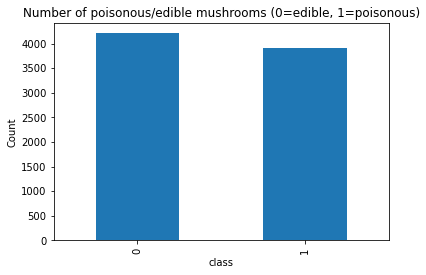

In [14]:
plt.figure()
pd.Series(data['class']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("class")
plt.title('Number of poisonous/edible mushrooms (0=edible, 1=poisonous)');


The dataset is balanced.

# Model, predict and estimate the result:

In [15]:
X=data.drop(['class'], axis=1)
Y=data['class']

In [16]:
from sklearn.model_selection import train_test_split 
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.1)

# Decision tree classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
clf_model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [21]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

In [25]:
y_predict = clf_model.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(Y_test,y_predict)

0.964329643296433

In [28]:
from sklearn import tree
import graphviz

ModuleNotFoundError: No module named 'graphviz'

# Gaussian Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB( )
classifier.fit(X_train, Y_train)

GaussianNB()

In [32]:
Y_pred = classifier.predict(X_test)
Y_pred

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,

# Making the Confusion Matrix.

In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test,Y_pred)
cm

array([[377,  26],
       [ 34, 376]], dtype=int64)

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test,Y_pred)
accuracy_score(Y_test,Y_pred)
# cm

0.9261992619926199

# Conclusion

In [ ]:
753 mushrooms are edible and 60 mushrooms are poisonous.